<a href="https://colab.research.google.com/github/AndryADSM/Asset-Analyzer/blob/main/Asset-Analyzer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 📈 Best Asset for Trading
Start Date: Mon 18/3/2024  
My Website: https://aadsm2355.wixsite.com/andryadsm

# Conclusions
# Methods

DONE Scrape data about stocks and ETFs

DONE Know what is the performance (% up/down, %move up/down) by time frames (close to open, week, intraday, month)

Correlation to volume, day of week, period, ¿moving averages, earnings?  
first candle up/down move to close

Compare to SPY, do separated analysis and explain some things

Create a kind of package for different functions
- One asset analyzer
- Multiple asset analyzer
- Data normalizer and visualizer
- Return for different time frames
- Show top and bottom n performers

make an include list for fuction to know which insights to know

Usefull sites  
https://pandas.pydata.org/docs/reference/api/pandas.Series.dt.html

---
# ⤵️ Importing

In [ ]:
!pip install yfinance

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf

sns.set()
plt.style.use('dark_background') # Dark mode plots

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 23.7 MB/s eta 0:00:0000:0100:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.0/73.0 kB 3.3 MB/s eta 0:00:00
  Created wheel for peewee: filename=peewee-3.17.1-cp310-cp310-linux_x86_64.whl size=291653 sha256=89146e14bd25a82db02cda2e8143468bb11761c7d7b04e196e5c27390ced9125
  Stored in directory: /root/.cache/pip/wheels/d7/35/5c/1374782be033462df5f40174d8d879519d64ed8c25a1977554
Successfully built peewee


---
# 🔎 Analysis of SPY

In [ ]:
######## Download and prepare data

# Download the data
data = yf.download('SPY', '2019-01-01', '2024-01-01')

# Drop column 'Adj Close', we will only use 'Close'
data = data.drop(columns=['Adj Close'])

# Rename column to lowercase (personal preference)
data = data.rename(columns={col: col.lower() for col in data.columns})

# Weekday number and day
data['weekday_num']  = data.index.to_frame()['Date'].dt.dayofweek
data['weekday_name'] = data.index.to_frame()['Date'].dt.day_name()

data.head(3)

[*********************100%%**********************]  1 of 1 completed


,open,high,low,close,volume,weekday_num,weekday_name
Date,,,,,,,
2019-01-02,245.979996,251.210007,245.949997,250.179993,126925200,2,Wednesday
2019-01-03,248.229996,248.570007,243.669998,244.210007,144140700,3,Thursday
2019-01-04,247.589996,253.110001,247.169998,252.389999,142628800,4,Friday


In [ ]:
######## Returns in percentage in different time frames

returns = pd.DataFrame()

# Intraday, open to close
returns['intraday_ret'] = 100 - data['open'] * 100 / data['close']

# Overnight, close of previous day and todays open
returns['overnight_ret'] = 100 - data['close'].shift(1) * 100 / data['open']

# Daily, close to close
returns['daily_ret'] = data['close'].pct_change()

# Weekly and 2-3-4-week, 5 days apart per week close to close
for week, shift in [(i, i * 5) for i in range(1, 5)]:
    returns[f'{week}week_ret'] = 100 - data['close'].shift(shift) * 100 / data['close']

returns

,intraday_ret,overnight_ret,daily_ret,1week_ret,2week_ret,3week_ret,4week_ret
Date,,,,,,,
2019-01-02,1.678790,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-03,-1.646120,-0.785561,-0.023863,NaN,NaN,NaN,NaN
2019-01-04,1.901820,1.365156,0.033496,NaN,NaN,NaN,NaN
2019-01-07,0.664361,0.118724,0.007885,NaN,NaN,NaN,NaN
2019-01-08,-0.019480,0.950083,0.009395,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
2023-12-22,-0.044335,0.244792,0.002010,0.912067,2.839646,3.071886,3.874170
2023-12-26,0.332174,0.088597,0.004223,0.773677,2.871860,3.986123,4.450748
2023-12-27,0.224551,-0.044168,0.001808,0.350468,2.604353,4.178297,4.528765


In [ ]:
######## Display the top and bottom n results

insights = pd.DataFrame(index=['SPY'])

# Volatility
insights['volatility'] = [returns['daily_ret'].std() * 100]

# Mean of returns
for col in returns.columns:
    insights[f'{col}_mean'] = [returns[col].mean()]
    insights[f'{col}_mean_abs'] = [returns[col].abs().mean()]

insights = insights.T

insights

,SPY
volatility,1.327386
intraday_ret_mean,0.025383
intraday_ret_mean_abs,0.660692
overnight_ret_mean,0.018679
overnight_ret_mean_abs,0.534455
daily_ret_mean,0.000599
daily_ret_mean_abs,0.008794
1week_ret_mean,0.216454
1week_ret_mean_abs,1.923519
2week_ret_mean,0.418829


---
# 🎛️ Parameters for the Functions

In [ ]:
tickers = ['SPY', 'AAPL', 'TSLA', 'NVDA', 'DIS', 'BAC', 'XOM', 'GLD', 'CMG']
# ['SPY', 'AAPL', 'META', 'GOOGL', 'MSFT', 'NFLX', 'DIS', 'AMZN', 'TSLA', 'MRNA', 'CMG', 'AMD', 'NVDA', \
# 'BAC', 'XOM', 'CVX', 'USO', 'SLV', 'GLD'] \
start_date = '2019-01-01'
end_date = '2024-01-01' # Includes up to the day before this date
show_top = 3 # Display top/bottom n best assests
round_value = 2 # Number of decimals to display

---
# ✨ Function to Analyze Assests

In [ ]:
######## Download the data, get day of the week and normalized prices
def download_data(tks: list[str], start: str, end: str) -> pd.DataFrame:
    """
    Downloads data from Yahoo Finance, gets the weekday number and name and creates columns of normalized prices
    Params
    Returns a Pandas DataFrame
    """
    data = yf.download(tks, start=start, end=end, group_by='ticker')

# Drop the 'Adj Close' of every ticker, we will just use 'Close'
    for tk in tks:
        data.drop(columns=[(tk, 'Adj Close')], inplace=True, errors='ignore')

# Rename columns of second level to be lowercase (personal preference)
    for i in range(len(data.columns)):
        data.rename(columns={data.columns[i][1]: data.columns[i][1].lower()}, inplace=True)

# Get the week day number and name of every date
    data['weekday_num'] = data.index.to_frame()['Date'].dt.dayofweek
    data['weekday_name'] = data.index.to_frame()['Date'].dt.day_name()

# Calculate min and max price across all prices for each ticker and normalize between 0 and 1
    min_price = {tk: data[tk][['open', 'high', 'low', 'close']].min().min() for tk in tks}
    max_price = {tk: data[tk][['open', 'high', 'low', 'close']].max().max() for tk in tks}

    for tk in tks:
        for price in ['open', 'high', 'low', 'close']:
            data[tk, f'{price}_norm']  = (data[tk, price]  - min_price[tk]) / (max_price[tk] - min_price[tk])
        data[tk, 'volume_norm'] = (data[tk, 'volume'] - data[tk, 'volume'].min()) / (data[tk, 'volume'].max() - data[tk, 'volume'].min())

    return data

data = download_data(tickers, start_date, end_date)
data.head(3)

[*********************100%%**********************]  9 of 9 completed


Ticker           NVDA                                                    GLD  \
Price            open       high        low      close    volume        open   
Date                                                                           
2019-01-02  32.660000  34.619999  32.512501  34.055000  50875200  121.349998   
2019-01-03  33.447498  33.790001  31.922501  31.997499  70555200  121.779999   
2019-01-04  32.735001  34.432499  32.424999  34.047501  58562000  121.320000   

Ticker                                                    ...            \
Price             high         low       close    volume  ... open_norm   
Date                                                      ...             
2019-01-02  121.750000  120.879997  121.330002  12776200  ...  0.024162   
2019-01-03  122.459999  121.730003  122.430000  15440800  ...  0.029903   
2019-01-04  121.599998  120.690002  121.440002  13334000  ...  0.023762   

Ticker                                                      CMG            \
Price      high_norm  low_norm close_norm volume_norm open_norm high_norm   
Date                                                                        
2019-01-02  0.029502  0.017888   0.023895    0.246992  0.006636  0.016789   
2019-01-03  0.038980  0.029235   0.038580    0.305030  0.013929  0.018103   
2019-01-04  0.027500  0.015352   0.025364    0.259142  0.015005  0.021899   

Ticker                                       
Price       low_norm close_norm volume_norm  
Date                                         
2019-01-02  0.004645   0.014668    0.148547  
2019-01-03  0.011937   0.012646    0.141176  
2019-01-04  0.013592   0.020689    0.193420  

[3 rows x 92 columns]

---

In [ ]:
######## Returns in percentage in different time frames
def get_returns(tks: list[str], data: pd.DataFrame) -> pd.DataFrame:
    returns = pd.DataFrame(index=data.index, columns=pd.MultiIndex.from_product([[], []], names=['Ticker', 'TimeFrame']))

    for tk in tks:
#     Intraday, open to close
        returns[tk, 'intraday_ret'] = 100 - data[tk, 'open'] * 100 / data[tk, 'close']
#     Overnight, close of previous day and todays open
        returns[tk, 'overnight_ret'] = 100 - data[tk, 'close'].shift(1) * 100 / data[tk, 'open']
#     Daily, close to close
        returns[tk, 'daily_ret'] = data[tk, 'close'].pct_change()
#     Weekly and 2-3-4-week, 5 days apart per week close to close
        for week, shift in [(i, i * 5) for i in range(1, 5)]:
            returns[tk, f'{week}week_ret'] = 100 - data[tk, 'close'].shift(shift) * 100 / data[tk, 'close']
    return returns

returns = get_returns(tickers, data)
returns.head(3)

Ticker              SPY                                                        \
TimeFrame  intraday_ret overnight_ret daily_ret 1week_ret 2week_ret 3week_ret   
Date                                                                            
2019-01-02      1.67879           NaN       NaN       NaN       NaN       NaN   
2019-01-03     -1.64612     -0.785561 -0.023863       NaN       NaN       NaN   
2019-01-04      1.90182      1.365156  0.033496       NaN       NaN       NaN   

Ticker                       AAPL                          ...       GLD  \
TimeFrame  4week_ret intraday_ret overnight_ret daily_ret  ... 2week_ret   
Date                                                       ...             
2019-01-02       NaN     1.918692           NaN       NaN  ...       NaN   
2019-01-03       NaN    -1.258874     -9.681902 -0.099607  ...       NaN   
2019-01-04       NaN     2.515848      1.619039  0.042689  ...       NaN   

Ticker                                  CMG                                    \
TimeFrame  3week_ret 4week_ret intraday_ret overnight_ret daily_ret 1week_ret   
Date                                                                            
2019-01-02       NaN       NaN     3.502797           NaN       NaN       NaN   
2019-01-03       NaN       NaN    -0.564337     -0.323579 -0.008819       NaN   
2019-01-04       NaN       NaN     2.415382      1.027003  0.035385       NaN   

Ticker                                    
TimeFrame  2week_ret 3week_ret 4week_ret  
Date                                      
2019-01-02       NaN       NaN       NaN  
2019-01-03       NaN       NaN       NaN  
2019-01-04       NaN       NaN       NaN  

[3 rows x 63 columns]

---

In [ ]:
######## Getting useful insights
def get_insights(tks: list[str], returns: pd.DataFrame) -> pd.DataFrame:
    insights = pd.DataFrame()

# Volatility
    insights['volatility'] = {tk: (returns[tk, 'daily_ret'].std() * 100) for tk in tks}

# Mean of returns
    for col in returns.columns.get_level_values(1).unique():
        insights[f'{col}_mean'] = {tk: returns[tk, col].mean() for tk in tks}
        insights[f'{col}_mean_abs'] = {tk: returns[tk, col].abs().mean() for tk in tks}
    insights = insights.T

    return insights

insights = get_insights(tickers, returns)
insights

,SPY,AAPL,TSLA,NVDA,DIS,BAC,XOM,GLD,CMG
volatility,1.327386,2.031103,4.075717,3.261231,2.111465,2.255998,2.167731,0.940940,2.235209
intraday_ret_mean,0.025383,0.108124,-0.018379,0.068722,-0.080849,-0.006386,-0.023849,-0.002152,0.019852
intraday_ret_mean_abs,0.660692,1.141785,2.377632,1.908714,1.118729,1.155206,1.211519,0.445390,1.268448
overnight_ret_mean,0.018679,-0.000763,0.133471,0.095668,0.045036,0.007882,0.031924,0.033973,0.089362
overnight_ret_mean_abs,0.534455,0.816046,1.645294,1.262312,0.799668,0.958378,0.922668,0.491182,0.720891
daily_ret_mean,0.000599,0.001468,0.002810,0.002660,0.000072,0.000491,0.000522,0.000406,0.001553
daily_ret_mean_abs,0.008794,0.014331,0.028847,0.023893,0.014122,0.015208,0.015580,0.006883,0.014885
1week_ret_mean,0.216454,0.571708,0.540397,0.833999,-0.175889,-0.003094,0.033197,0.158026,0.508472
1week_ret_mean_abs,1.923519,3.124793,6.979176,5.220196,3.261149,3.561597,3.381772,1.584438,3.641675
2week_ret_mean,0.418829,1.141066,1.003070,1.623851,-0.363691,-0.034255,0.046876,0.314378,0.981438


In [ ]:
######## Display the top and bottom n results
def top_results(insights, top:int=3, bot:int=3, round_val:int=6) -> None:
    for i in insights.index:
        display(pd.DataFrame([insights.loc[i].nlargest(top).round(round_val),
                              insights.loc[i].nsmallest(bot).round(round_val).sort_values(ascending=False)
                             ], index=[f'Top {i}', f'Bottom {i}']))

top_results(insights, show_top, show_top, round_value)

,TSLA,NVDA,BAC,AAPL,SPY,GLD
Top volatility,4.08,3.26,2.26,NaN,NaN,NaN
Bottom volatility,NaN,NaN,NaN,2.03,1.33,0.94


,AAPL,NVDA,SPY,XOM,TSLA,DIS
Top intraday_ret_mean,0.11,0.07,0.03,NaN,NaN,NaN
Bottom intraday_ret_mean,NaN,NaN,NaN,-0.02,-0.02,-0.08


,TSLA,NVDA,CMG,DIS,SPY,GLD
Top intraday_ret_mean_abs,2.38,1.91,1.27,NaN,NaN,NaN
Bottom intraday_ret_mean_abs,NaN,NaN,NaN,1.12,0.66,0.45


,TSLA,NVDA,CMG,SPY,BAC,AAPL
Top overnight_ret_mean,0.13,0.1,0.09,NaN,NaN,NaN
Bottom overnight_ret_mean,NaN,NaN,NaN,0.02,0.01,-0.0


,TSLA,NVDA,BAC,CMG,SPY,GLD
Top overnight_ret_mean_abs,1.65,1.26,0.96,NaN,NaN,NaN
Bottom overnight_ret_mean_abs,NaN,NaN,NaN,0.72,0.53,0.49


,TSLA,NVDA,CMG,DIS,GLD,BAC
Top daily_ret_mean,0.0,0.0,0.0,NaN,NaN,NaN
Bottom daily_ret_mean,NaN,NaN,NaN,0.0,0.0,0.0


,TSLA,NVDA,XOM,GLD,SPY,DIS
Top daily_ret_mean_abs,0.03,0.02,0.02,NaN,NaN,NaN
Bottom daily_ret_mean_abs,NaN,NaN,NaN,0.01,0.01,0.01


,NVDA,AAPL,TSLA,XOM,BAC,DIS
Top 1week_ret_mean,0.83,0.57,0.54,NaN,NaN,NaN
Bottom 1week_ret_mean,NaN,NaN,NaN,0.03,-0.0,-0.18


,TSLA,NVDA,CMG,AAPL,SPY,GLD
Top 1week_ret_mean_abs,6.98,5.22,3.64,NaN,NaN,NaN
Bottom 1week_ret_mean_abs,NaN,NaN,NaN,3.12,1.92,1.58


,NVDA,AAPL,TSLA,XOM,BAC,DIS
Top 2week_ret_mean,1.62,1.14,1.0,NaN,NaN,NaN
Bottom 2week_ret_mean,NaN,NaN,NaN,0.05,-0.03,-0.36


,TSLA,NVDA,CMG,AAPL,SPY,GLD
Top 2week_ret_mean_abs,10.37,7.72,5.33,NaN,NaN,NaN
Bottom 2week_ret_mean_abs,NaN,NaN,NaN,4.71,2.78,2.18


,NVDA,AAPL,CMG,XOM,BAC,DIS
Top 3week_ret_mean,2.38,1.7,1.41,NaN,NaN,NaN
Bottom 3week_ret_mean,NaN,NaN,NaN,0.04,-0.14,-0.56


,TSLA,NVDA,CMG,DIS,SPY,GLD
Top 3week_ret_mean_abs,13.16,9.65,6.77,NaN,NaN,NaN
Bottom 3week_ret_mean_abs,NaN,NaN,NaN,5.97,3.53,2.69


,NVDA,AAPL,CMG,XOM,BAC,DIS
Top 4week_ret_mean,3.16,2.24,1.85,NaN,NaN,NaN
Bottom 4week_ret_mean,NaN,NaN,NaN,0.03,-0.25,-0.75


,TSLA,NVDA,CMG,DIS,SPY,GLD
Top 4week_ret_mean_abs,15.9,11.03,7.9,NaN,NaN,NaN
Bottom 4week_ret_mean_abs,NaN,NaN,NaN,6.88,4.11,3.07


---

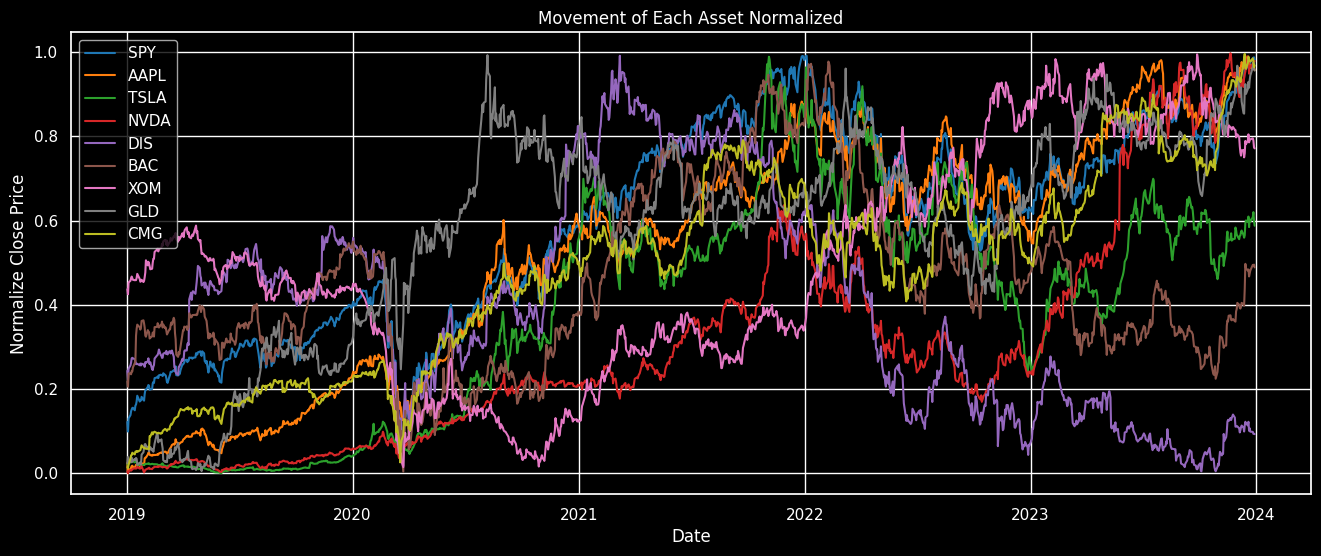

In [ ]:
colors = plt.cm.tab10.colors # ['green', 'red', 'blue', 'yellow', 'purple', 'orange']

plt.figure(figsize=(16, 6))
# plt.plot(data['SPY', 'close_norm'], label='SPY', color='green')
# plt.plot(data['TSLA', 'close_norm'], label='AAPL', color='red')
for i, ticker in enumerate(tickers):
    plt.plot(data[ticker, 'close_norm'], label=ticker, color=colors[i])
plt.xlabel('Date')
plt.ylabel('Normalize Close Price')
plt.legend()
plt.title('Movement of Each Asset Normalized')
plt.show()

In [ ]:
# plt.figure(figsize=(16, 6))
# # for i, ticker in enumerate(tickers):
# sns.distplot(returns['SPY', 'daily_ret'], label='SPY', color='green')
# sns.distplot(returns['TSLA', 'daily_ret'], label='TSLA', color='red')
# plt.xlabel('Date')
# plt.ylabel('Return')
# plt.legend()
# plt.title('Distribution of Daily Return')
# plt.show()

In [ ]:
# sns.heatmap(data[data['SPY', 'close_open_pct_change'] > 1][[('SPY', 'close_open_pct_change'), ('week_day_num', ''), ('SPY', 'volume')]].corr(),
#             annot=True, center=0, cmap='coolwarm')
# plt.show()

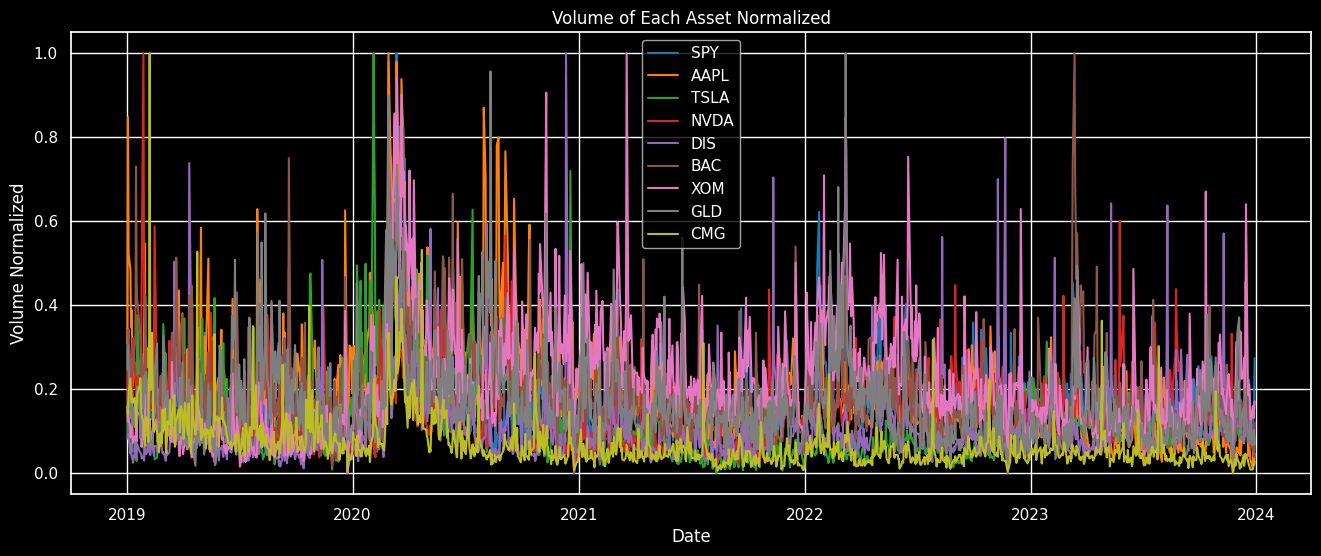

In [ ]:
colors = plt.cm.tab10.colors # ['green', 'red', 'blue', 'yellow', 'purple', 'orange']

plt.figure(figsize=(16, 6))
# plt.plot(data['SPY', 'close_norm'], label='SPY', color='green')
# plt.plot(data['TSLA', 'close_norm'], label='AAPL', color='red')
for i, ticker in enumerate(tickers):
    plt.plot(data[ticker, 'volume_norm'], label=ticker, color=colors[i])
plt.xlabel('Date')
plt.ylabel('Volume Normalized')
plt.legend()
plt.title('Volume of Each Asset Normalized')
plt.show()